In [56]:
import pandas as pd

In [126]:
import os
import glob
path = os.getcwd() + '/threads/*.csv'
all_files = glob.glob(path)

In [127]:
df_list = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df_list.append(df)

df = pd.concat(df_list, axis=0, ignore_index=True)

In [128]:
# param cols
import re
# убираем имена пакетов из бенчмарков
df['Benchmark'] = df['Benchmark'].apply(lambda x : x[x.rfind('.') + 1:]) 
# оставляем все бенчмарки не из perfnorm профайлера, а также LLC-load-misses
benchmarks = sorted(set(filter(lambda x : (not re.search(':', x)) or re.search('LLC-load-misses', x), df['Benchmark'])))


In [129]:
import matplotlib.pyplot as plt

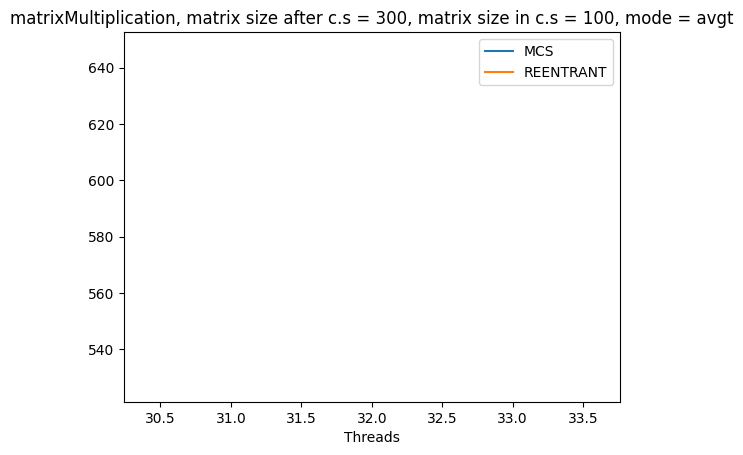

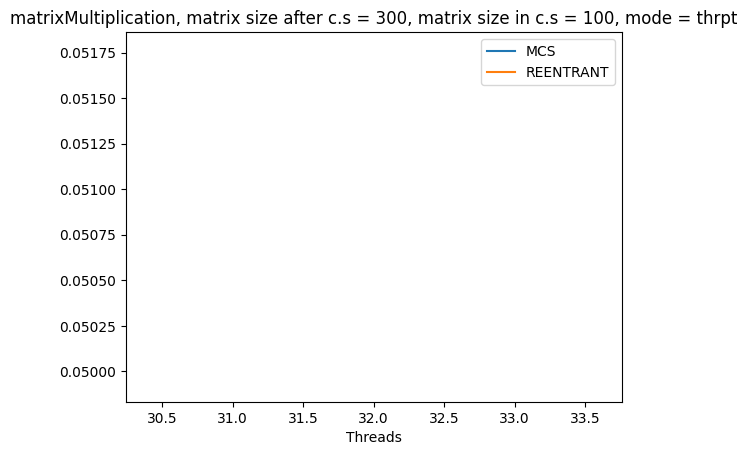

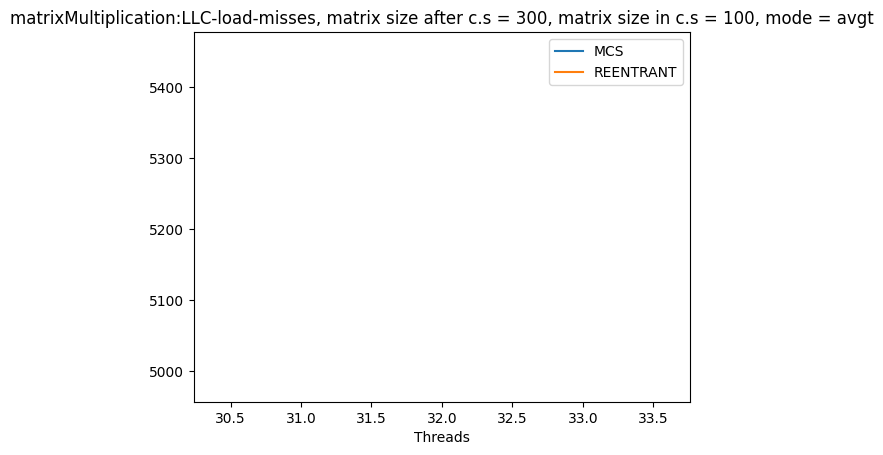

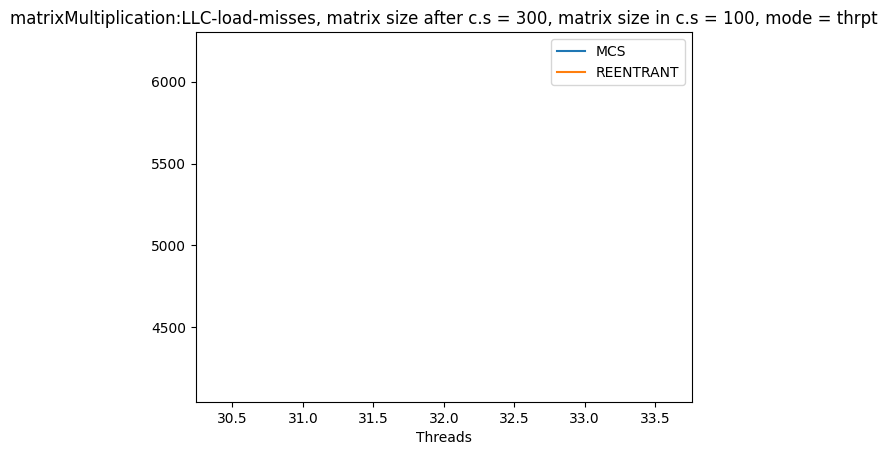

In [130]:
# оставляем только бенчмарки с матрицей
df_matrix = df[df['Benchmark'].isin(filter(lambda x : re.search('matrixMultiplication', x), benchmarks))].copy()
# берем типы локов
locks = set(df_matrix['Param: lockType'])
# берем режимы (thrpt, avg)
modes = set(df_matrix['Mode'])
# зададим параметры бенчмарка в его названии
df_matrix['Benchmark'] = df_matrix['Benchmark'] \
   + ', matrix size after c.s = ' \
     + df_matrix['Param: afterSectionMatrixSize'].astype(str) \
        + ', matrix size in c.s = ' + df_matrix['Param: inSectionMatrixSize'].astype(str)
for b in sorted(set(df_matrix['Benchmark'])):
    for mode in modes:
        title = b + ', mode = ' + mode
        ax = plt.axes(title = title)
        for lock in locks:
            df_matrix[(df_matrix['Benchmark'] == b) & (df_matrix['Mode'] == mode) & (df_matrix['Param: lockType'] == lock)].plot(ax=ax, x='Threads', y='Score', label = lock)
        plt.show()    

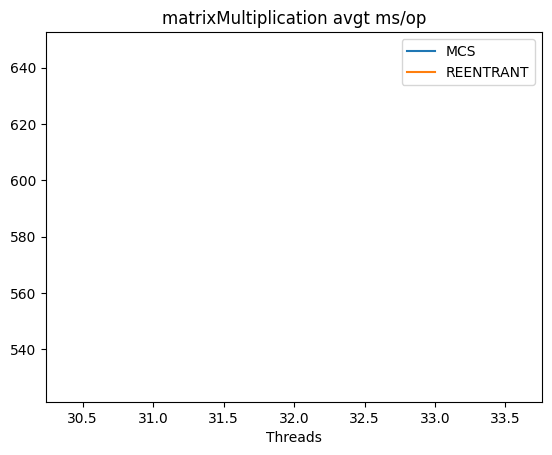

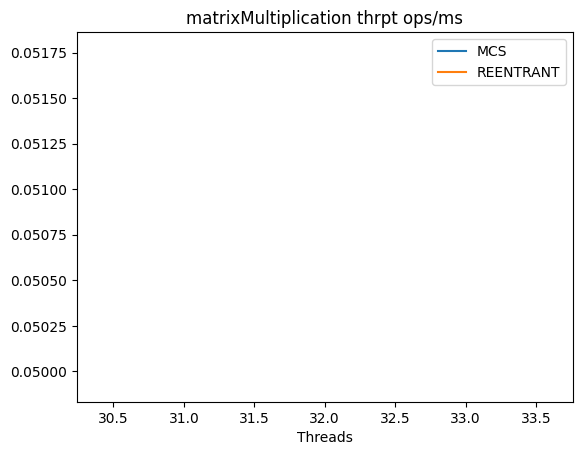

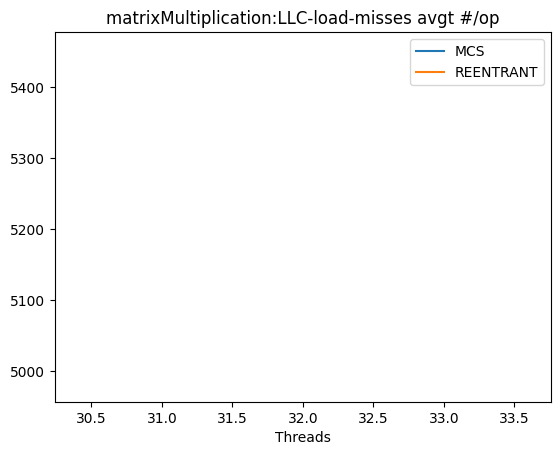

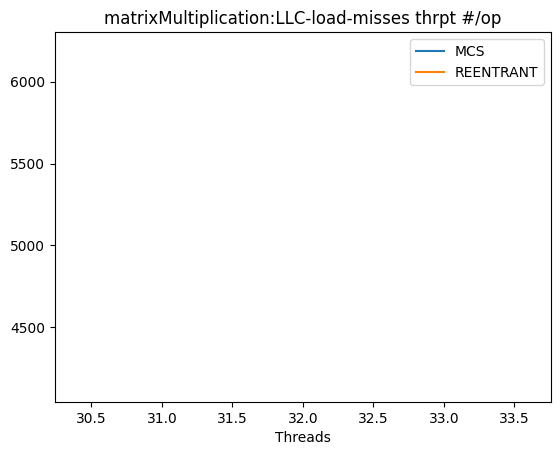

In [131]:
import matplotlib.pyplot as plt
import re
for benchmark in benchmarks:
    df_bench = df[df['Benchmark'] == benchmark]
    modes = set(df_bench['Mode'])
    for mode in modes:
        df_bench_mode = df_bench[df_bench['Mode'] == mode]
        ax = plt.axes(title = benchmark + ' ' + mode  + ' ' + df_bench_mode.iloc[0]['Unit'])
        #plot = plt.plot(title = benchmark + ' ' + mode + ' ' + df_bench_mode.iloc[0]['Unit'])
        locks = set(df_bench['Param: lockType'])
        for lock in locks:
            df_bench_lock = df_bench_mode[df_bench_mode['Param: lockType'] == lock]
            df_bench_lock.plot(ax=ax,x='Threads',y='Score',label=lock)
        plt.show()    